##**CUSTOMER SEGMENTATION**

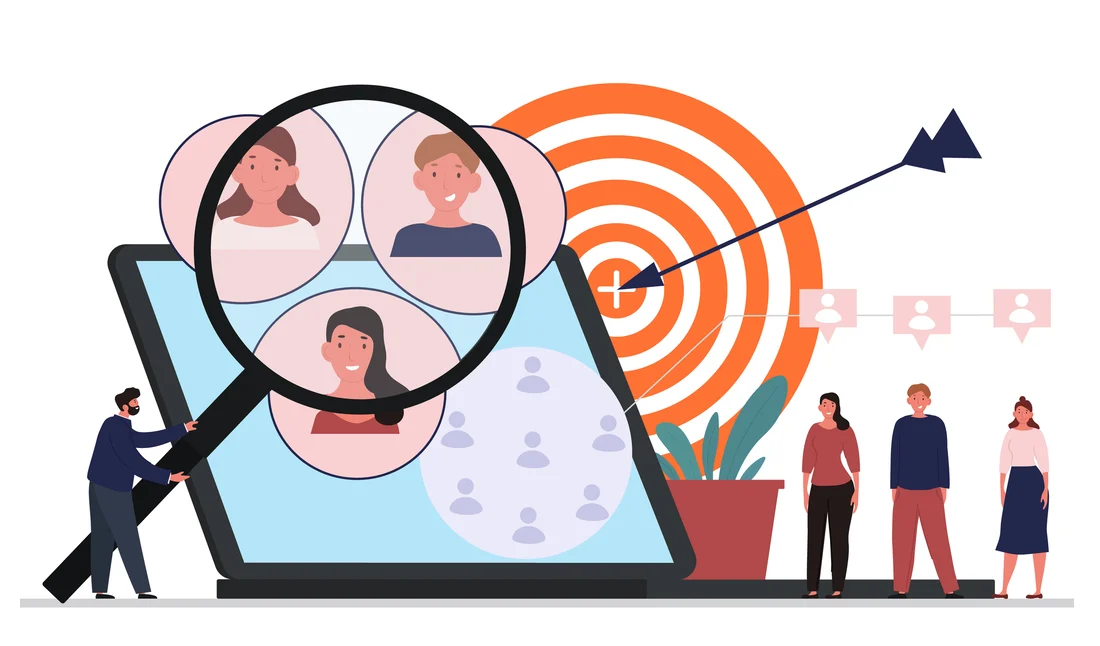

#**DATA INGESTION
Data ingestion refers to the process of collecting, importing, and transferring data from various sources into a system for further analysis or processing. This step ensures that data is standardized, cleaned, and structured for effective use.**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")
products = pd.read_csv("/content/Products.csv")


customers.columns,transactions.columns


(Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object'),
 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
        'Quantity', 'TotalValue', 'Price'],
       dtype='object'))

In [4]:
transactions.shape,customers.shape

((1000, 7), (200, 4))

In [5]:
transactions.head(1)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68


In [6]:
customers.head(2)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13


#**DATA TRANSFORMATION
Data transformation involves converting raw data into a structured and usable format for analysis. This includes tasks like normalizing values, encoding categorical variables, aggregating data (e.g., calculating totals or averages), and merging datasets. Transformation ensures data consistency, improves model performance, and aligns data with analysis requirements or business objectives.**

In [24]:
# Step 1: Merge datasets
# Assuming 'CustomerID' is the common key
data = pd.merge(customers, transactions, on='CustomerID')
data.head(2),data.shape

(  CustomerID      CustomerName         Region  SignupDate TransactionID  \
 0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
 1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
 
   ProductID      TransactionDate  Quantity  TotalValue   Price  
 0      P054  2024-01-19 03:12:55         2      114.60   57.30  
 1      P022  2024-09-17 09:01:18         3      412.62  137.54  ,
 (1000, 10))

In [26]:
# Step 2: Feature Engineering (Example: RFM Metrics)
data['Recency'] = (pd.to_datetime('2025-01-01') - pd.to_datetime(data['SignupDate'])).dt.days
rfm = data.groupby('CustomerID').agg({
    'Recency': 'min',
    'TotalValue': ['sum', 'count']
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Monetary', 'Frequency']
data.head(2)
rfm.head(2),rfm.shape

(  CustomerID  Recency  Monetary  Frequency
 0      C0001      906   3354.52          5
 1      C0002     1053   1862.74          4,
 (199, 4))

#**DATA PREPROCESSING
Data preprocessing is the process of cleaning and preparing raw data for analysis or modeling. It involves tasks such as handling missing values, removing duplicates, scaling numerical features, encoding categorical variables, and normalizing data. This step ensures data quality, consistency, and readiness for accurate and efficient analysis.**

In [15]:
# Step 3:
# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Monetary', 'Frequency']])
rfm_scaled

array([[ 1.148752  , -0.06170143, -0.01145819],
       [ 1.60043068, -0.87774353, -0.46749414],
       [-0.71327032, -0.40585722, -0.46749414],
       [ 0.86914138,  1.03254704,  1.35664965],
       [ 1.03813681, -0.78392861, -0.92353008],
       [-0.52891167,  0.41587942, -0.46749414],
       [ 1.21635017, -0.48548229, -0.92353008],
       [-0.54734754,  0.43997044,  2.26872154],
       [-0.08030564, -1.40630171, -0.92353008],
       [ 0.66327423, -0.9571662 , -0.46749414],
       [ 0.67249216,  0.14369581, -0.01145819],
       [-1.18338486,  0.96492372,  0.9006137 ],
       [-0.93757334,  1.38575064,  0.9006137 ],
       [-1.04204324, -1.72239508, -1.83560198],
       [-0.38142476, -1.26353893, -1.37956603],
       [-0.5166211 ,  0.22269727, -0.01145819],
       [-0.42751442,  0.70375173,  1.35664965],
       [-1.32165385,  0.71908486, -0.01145819],
       [ 0.5772402 , -0.70101045,  0.44457776],
       [-1.00824415, -1.39212827, -1.83560198],
       [ 0.28533901,  1.0681256 ,  1.356

#**MODEL TRAINING
Model training is the process of teaching a machine learning model to recognize patterns in data by feeding it labeled (supervised) or unlabeled (unsupervised) datasets. During training, the model adjusts its parameters to minimize errors and improve predictions, creating a learned representation for future data predictions or classifications.**

In [18]:
# Step 4:
# Experiment with cluster numbers between 2 and 10
results = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(rfm_scaled)

    # Calculate metrics
    db_index = davies_bouldin_score(rfm_scaled, clusters)
    silhouette_avg = silhouette_score(rfm_scaled, clusters)
    results[n_clusters] = {'DB_Index': db_index, 'Silhouette_Score': silhouette_avg}

    print(f'Clusters: {n_clusters}, DB Index: {db_index:.4f}, Silhouette Score: {silhouette_avg:.4f}')

Clusters: 2, DB Index: 1.1653, Silhouette Score: 0.3343
Clusters: 3, DB Index: 0.9976, Silhouette Score: 0.3388
Clusters: 4, DB Index: 0.8822, Silhouette Score: 0.3501
Clusters: 5, DB Index: 0.9694, Silhouette Score: 0.3135
Clusters: 6, DB Index: 0.9410, Silhouette Score: 0.3188
Clusters: 7, DB Index: 1.0600, Silhouette Score: 0.2909
Clusters: 8, DB Index: 1.0764, Silhouette Score: 0.2947
Clusters: 9, DB Index: 1.0336, Silhouette Score: 0.3007
Clusters: 10, DB Index: 1.0738, Silhouette Score: 0.2829


##**MODEL EVALUATION
Model evaluation assesses a machine learning model's performance using metrics like accuracy, precision, recall, silhoutte score, DB Index. It involves testing the model on unseen data (validation or test sets) to determine its ability to generalize. Effective evaluation ensures the model meets the desired accuracy and reliability for deployment.**

In [19]:
# Choose optimal clusters (e.g., lowest DB Index)
optimal_clusters = min(results, key=lambda x: results[x]['DB_Index'])
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

##**DATA VISUALIZATION
Data visualization is the graphical representation of data using charts, graphs, and plots to uncover trends, patterns, and insights. It helps simplify complex datasets, making information more accessible and understandable. Tools like bar charts, scatter plots, and heatmaps are commonly used to communicate findings effectively to stakeholders.**

In [20]:
# Step 5
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'], rfm['PCA2'] = rfm_pca[:, 0], rfm_pca[:, 1]

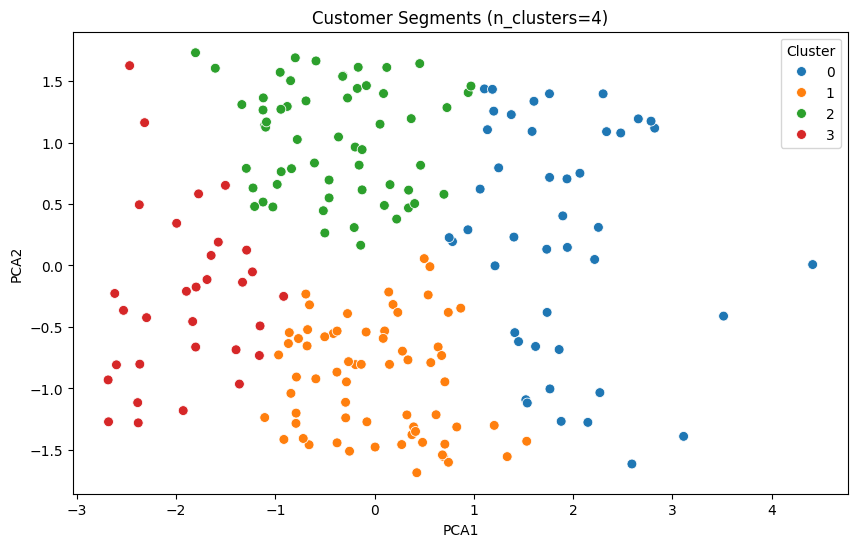

In [21]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50)
plt.title(f'Customer Segments (n_clusters={optimal_clusters})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

##**SAVING DEDUCED RESULTS**

In [22]:
# Step 6: Save results
rfm.to_csv('Clustered_Customers.csv', index=False)

In [23]:
# Summary
print("\nClustering Summary Report:")
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {results[optimal_clusters]['DB_Index']:.4f}")
print(f"Silhouette Score: {results[optimal_clusters]['Silhouette_Score']:.4f}")


Clustering Summary Report:
Optimal Number of Clusters: 4
Davies-Bouldin Index: 0.8822
Silhouette Score: 0.3501
